# Customer Segmentation Using RFM Analysis and K-Means Clustering

Customer segmentation is a crucial process for businesses to categorize customers into groups or clusters based on their shared characteristics. This allows companies to effectively and appropriately utilize marketing strategies. By creating customer segments, marketers can focus on one segment at a time and tailor their marketing strategies to their specific needs and preferences. This approach can lead to higher customer satisfaction, loyalty, and retention. 

Ultimately, customer segmentation is a powerful tool that can help businesses enhance their marketing efforts and drive revenue growth.

## Data

For my analysis, I'm using a dataset from a Walmart retail store that I obtained from Kaggle. This dataset contains transaction records from 2011 to 2014 and can be found at https://www.kaggle.com/datasets/naveenkumar20bps1137/walmart-sales-analysis. 
Each row in the dataset represents a transaction of a product and includes details such as the transaction ID, date, product type, quantity sold, and store location.

In [1]:
 

df_walmart = pd.read_csv('Walmart.csv')

**Dataset Metadata**

Edit: It appears that the Walmart retail store dataset has been removed from Kaggle since the time I started writing this commentary. Therefore, the metadata I'm providing below is derived from my understanding of the data rather than what the author wrote.

- _Order ID:_ A unique identification number for each order, consisting of two initial letters, a 4-digit year, and a 6-digit nominal number.
- _Order Date:_ The date on which the invoice/order was created.
- _Ship Date:_ The date on which the invoice/order was shipped to the customer.
- _Customer Name:_ The full name of the customer who placed the order.
- _Country:_ The country where the customer resides.
- _City:_ The city where the customer resides.
- _State:_ The state where the customer resides.
- _Category:_ The category of the product that the customer ordered.
- _Product Name:_ The name and description of the product.
- _Sales:_ The total revenue generated from the product sales.
- _Quantity:_ The quantity of the product that the customer purchased.
- _Profit:_ The profit generated from the sales.

**Preview of the dataset**

In [2]:
df_walmart.head(10)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
5,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5.0,34.47
6,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Tables,Chromcraft Rectangular Conference Tables,1706.18,9.0,85.31
7,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Konftel 250 Conference phone - Charcoal black,911.42,4.0,68.36
8,CA-2013-161389,06-12-2013,11-12-2013,Irene Maddox,United States,Seattle,Washington,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.98,3.0,132.59
9,CA-2011-167164,13-05-2011,15-05-2011,Alejandro Grove,United States,West Jordan,Utah,Storage,Fellowes Super Stor/Drawer,55.50,2.0,9.99


## Data Cleaning

During the data cleaning process, I observed the following:

- The dataset has no null records, so there is no need to remove any transactions.
- The profit column includes negative values, which could indicate that the sale resulted in a loss. While the reason for this loss cannot be determined, it may be due to a discount or sale period. Therefore, I decided to keep these negative profit values as they could provide meaningful insights later in the analysis.
- The Order ID column includes IDs that start with US-xxx-xxxxxx, which we can assume are orders from the United States. Based on this logic, we might assume that IDs starting with CA refer to a country starting with "Ca" (such as Canada). However, the Country, City, and State columns indicate that these transactions are actually from locations in the United States. Therefore, I will assumed that all transactions in the dataset are from the United States due to a lack of information.

In [3]:
df_walmart.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

In [4]:
df_walmart.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


## Data Transformation

During the data transformation process, I performed the following actions:

- Changed the data type of the Order Date and Ship Date columns to Datetime.
- Since the analysis was assumed to be taken right after the maximum date in the dataset, I created a snapshot date for analysis, which is one day after the last order was taken.
- In order to segment customers, I grouped the data by Customer Name and aggregated all transactions into five variables: Recency, Frequency, Monetary Value (part of RFM analysis). I also added two additional variables: Customer Tenure and the number of product categories that the customer has bought.

In [5]:
df_walmart['Order Date'] = pd.to_datetime(df_walmart['Order Date'])
df_walmart['Ship Date'] = pd.to_datetime(df_walmart['Ship Date'])
snapshotdate = df_walmart['Order Date'].max() + dt.timedelta(days=1)

In [6]:
df_walmart_rfm = df_walmart.groupby('Customer Name').agg(
    Recency = ('Order Date', lambda x: (snapshotdate - x.max()).days), #how many days after customer recent purchase
    Frequency = ('Order ID', 'nunique'), #how many times customer has placed an order
    MonataryValue = ('Sales', 'sum'), #how much customer spent
    Tenure = ('Order Date', lambda x: (snapshotdate - x.min()).days), #how long customer has been with us
    CategoriesBought =('Category','nunique') #number of product categories customer has purchased
              )

#walmart_rfm['AverageSpending'] = (walmart_rfm['MonataryValue']/walmart_rfm['Frequency']).round(2)

In [7]:
df_walmart_rfm

,Recency,Frequency,MonataryValue,Tenure,CategoriesBought
Customer Name,,,,,
Aaron Bergman,1278,1,309.59,1278,3
Aaron Hawkins,735,3,1328.13,1329,5
Aaron Smayling,237,3,737.03,462,3
Adam Bellavance,149,3,2693.92,835,4
Adam Hart,260,3,463.77,1142,5
...,...,...,...,...,...
Xylona Preis,83,4,660.19,1301,7
Yana Sorensen,10,4,5754.17,872,5
Yoseph Carroll,515,2,1215.68,751,2


To prepare the dataset for K-means clustering, I performed the following steps:

- In K-means clustering, it is recommended to have normally distributed data. However, I observed that the distribution shape of each variable was considerably skewed. To address this, I applied a logarithmic scale with _np.log_ to each variable, which should make them more normally distributed.

- After applying the logarithmic transformation, I standardized all the variables using _StandardScaler()_. This step ensures that all variables have the same scale with values centered around 0 and a standard deviation of 1 for each variable and are equally weighted during clustering.

**Distribution of each variable before taking log**

<AxesSubplot: xlabel='CategoriesBought', ylabel='Density'>

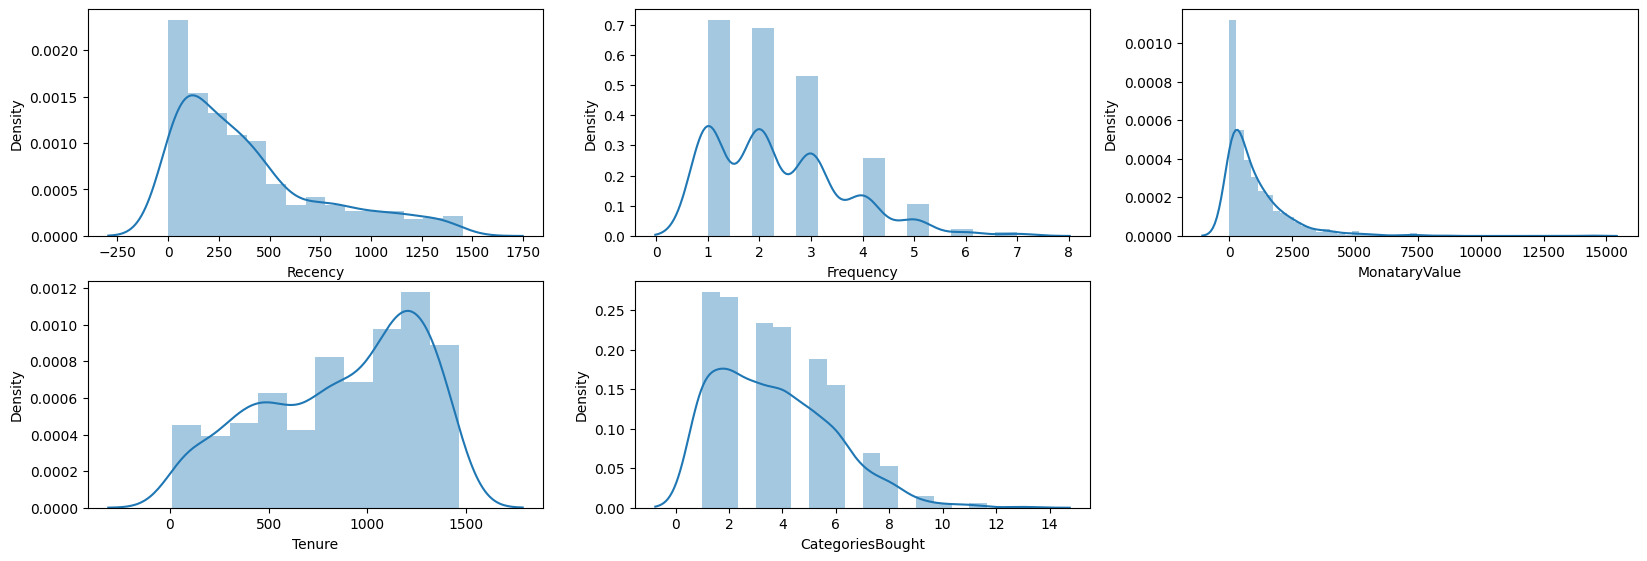

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.distplot(df_walmart_rfm['Recency'])

plt.subplot(3,3,2)
sns.distplot(df_walmart_rfm['Frequency'])

plt.subplot(3,3,3)
sns.distplot(df_walmart_rfm['MonataryValue'])

plt.subplot(3,3,4)
sns.distplot(df_walmart_rfm['Tenure'])

plt.subplot(3,3,5)
sns.distplot(df_walmart_rfm['CategoriesBought'])

#plt.subplot(3,3,6)
#sns.distplot(df_walmart_rfm['QuantityBought'])


**Distribution of each variable after taking log**

<AxesSubplot: xlabel='CategoriesBought', ylabel='Density'>

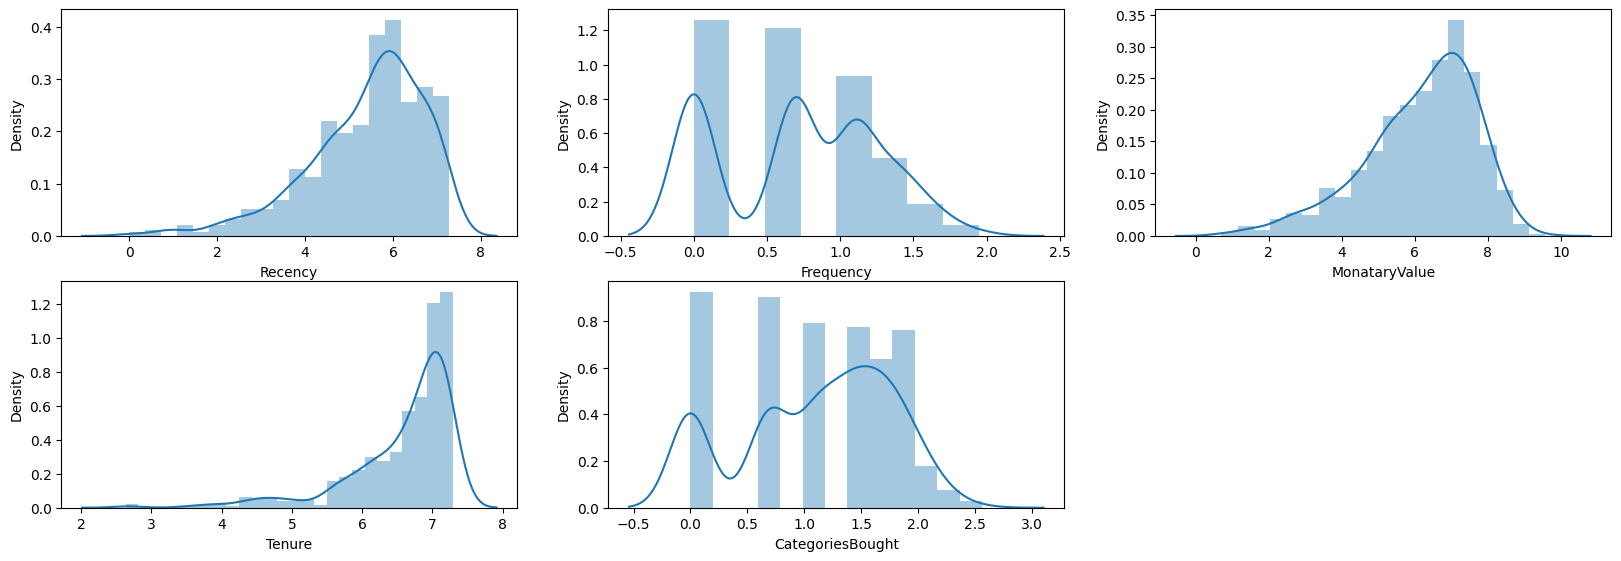

In [9]:
r_log = np.log(df_walmart_rfm['Recency'])
f_log = np.log(df_walmart_rfm['Frequency'])
m_log = np.log(df_walmart_rfm['MonataryValue'])
t_log = np.log(df_walmart_rfm['Tenure'])
c_log = np.log(df_walmart_rfm['CategoriesBought'])
#q_log = np.log(df_walmart_rfm['QuantityBought'])

df_walmart_rfm_log = df_walmart_rfm.copy()

df_walmart_rfm_log['rlog'] = r_log
df_walmart_rfm_log['flog'] = f_log
df_walmart_rfm_log['mlog'] = m_log
df_walmart_rfm_log['tlog'] = t_log
df_walmart_rfm_log['clog'] = c_log
#df_walmart_rfm_log['qlog'] = q_log

plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.distplot(r_log)

plt.subplot(3,3,2)
sns.distplot(f_log)

plt.subplot(3,3,3)
sns.distplot(m_log)

plt.subplot(3,3,4)
sns.distplot(t_log)

plt.subplot(3,3,5)
sns.distplot(c_log)

#plt.subplot(3,3,6)
#sns.distplot(q_log)


**Standardinzing Values**

In [10]:
kmean = df_walmart_rfm_log[['rlog', 'flog', 'mlog', 'tlog', 'clog']]
scale = StandardScaler()
scale.fit(kmean)
df_rfm_normalized = scale.transform(kmean)

In [11]:
col_names = {0:'Recency', 1:'Frequency', 2:'MonataryValue', 3:'Tenure', 4:'CategoriesBought'}

df_rfm_normalized = pd.DataFrame(df_rfm_normalized)
df_rfm_normalized = df_rfm_normalized.rename(columns = col_names)
df_rfm_normalized.head(10)

,Recency,Frequency,MonataryValue,Tenure,CategoriesBought
0,1.325122,-1.302980,-0.275105,0.755709,-0.008516
1,0.905619,0.713522,0.679177,0.806700,0.761097
2,0.047315,0.713522,0.293279,-0.570167,-0.008516
3,-0.304644,0.713522,1.142614,0.201088,0.424908
4,0.117554,0.713522,-0.010277,0.609092,0.761097
5,1.214133,-1.302980,-2.305410,0.564994,-1.663693
6,-0.584638,0.713522,0.680183,-0.570167,0.761097
7,-0.475137,0.713522,0.670110,0.740325,1.469208
8,0.468491,-1.302980,-3.096082,-0.716266,-1.663693
9,-0.070118,1.651142,0.342291,0.447742,1.035784


## K-Means Clustering

K-Means Clustering is a simple algorithms used to group similar data points together. 
- It works by assigning data point to one of clusters based on its closest distance from the center point (or centroid) of each cluster. 
- The center/centroid of each cluster is the mean of the datapoint that assigned to it.

To start the K-Means clustering, first, we must determine number of clusters we will have. In this case we will use an _Elbow Method_ and _Silhouette Coefficient_ to findout how many cluster we should have.
- **_Silhouette Coefficient_**, measures of how close a data point to its assigned cluster compared to other clusters. It ranges from -1 to 1, where higher values indicate better cluster assignments.

- **_Elbow Method_**, is a graphical technique helps to determine the optimal number of clusters in a dataset by plotting a graph that shows how much the data points are spread out from their assigned cluster centers for different numbers of clusters. 

Text(0, 0.5, 'Inertia')

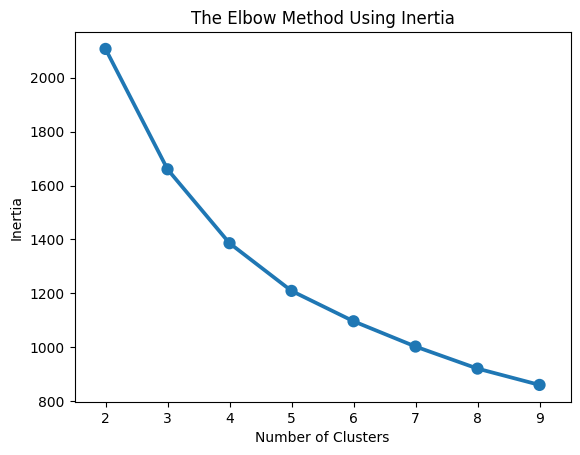

In [12]:
from sklearn.metrics import silhouette_score
sse_s = {}
sse_e = {}

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_rfm_normalized)
    sse_s[k] = silhouette_score(df_rfm_normalized, kmeans.labels_)
    sse_e[k] = kmeans.inertia_
    #inertia refers to the sum of squared distances between each data point and its assigned cluster center
sns.pointplot(x=list(sse_e.keys()), y=list(sse_e.values()))
plt.title('The Elbow Method Using Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')




A rules of thumb for choosing cluster are as follows:
- For _Silhouette Coefficient_ we should look for cluster with relatively high coefficient, the result indicates that 2 is the best clusters amount 
- For _Elbow Method_ we should look for cluster that inertia do not change significantly when cluster increase, the result indicates that 3-4 cluster is the best amount

In this case, i will be choosing 4 clusters based on _Elbow Method_ and also 4 clusters in _Silhouette Coefficient_ is still relatively high compared to other clusters

In [13]:
#Silhouette Coefficient
sse_s

{2: 0.36248767569902285,
 3: 0.3503540755631173,
 4: 0.2695652412172391,
 5: 0.25083464235624486,
 6: 0.2289640732912456,
 7: 0.2474005563989275,
 8: 0.22832283750241916,
 9: 0.22835145275167462}

In [14]:
#Elbow Method, Inertia
sse_e

{2: 2106.876360942736,
 3: 1660.3191783734346,
 4: 1386.129031420474,
 5: 1209.254511905015,
 6: 1096.584689079049,
 7: 1002.7475826519301,
 8: 920.9827977782957,
 9: 860.4457046335644}

Building K-Means clustering model

In [15]:
rfm_kmeans = KMeans(n_clusters=5, random_state=1).fit(df_rfm_normalized)
cluster_labels = rfm_kmeans.labels_
df_walmart_rfm = df_walmart_rfm.assign(cluster = cluster_labels).reset_index()

In [16]:
df_walmart_rfm.head(5)

,Customer Name,Recency,Frequency,MonataryValue,Tenure,CategoriesBought,cluster
0,Aaron Bergman,1278,1,309.59,1278,3,2
1,Aaron Hawkins,735,3,1328.13,1329,5,4
2,Aaron Smayling,237,3,737.03,462,3,2
3,Adam Bellavance,149,3,2693.92,835,4,4
4,Adam Hart,260,3,463.77,1142,5,4


## Analyzing Cluster Segments

In [17]:
df_walmart_rfm.groupby('cluster').agg(Customer_count = ('Customer Name', 'count'))

,Customer_count
cluster,
0,142
1,92
2,205
3,56
4,191


In [18]:
df_walmart_rfm.groupby('cluster').mean().round().reset_index()

,cluster,Recency,Frequency,MonataryValue,Tenure,CategoriesBought
0,0,802.0,1.0,220.0,826.0,1.0
1,1,31.0,3.0,1296.0,904.0,4.0
2,2,468.0,2.0,788.0,871.0,3.0
3,3,99.0,1.0,411.0,121.0,2.0
4,4,293.0,4.0,2044.0,1099.0,6.0


## **Visualizing Cluster Segments**

**Snake plot**

A snake plot is a way to visualize the average values of each RFM variable across different clusters. It shows a line plot of the average values for each variable in each cluster, with the lines connecting the values for each variable for a given cluster. 

This can help us to easily compare the clusters and see which variables are driving the differences between them.

In [19]:
df_snake_walmart_rfm = df_rfm_normalized.copy()
df_snake_walmart_rfm['Customer Name'] = df_walmart_rfm['Customer Name']
df_snake_walmart_rfm['cluster'] = df_walmart_rfm['cluster']
df_snake_walmart_rfm = pd.melt(df_snake_walmart_rfm, id_vars=['cluster'], value_vars=['Recency', 'Frequency', 'MonataryValue', 'Tenure', 'CategoriesBought'], var_name='attribute', value_name='value')

(-4.0, 4.0)

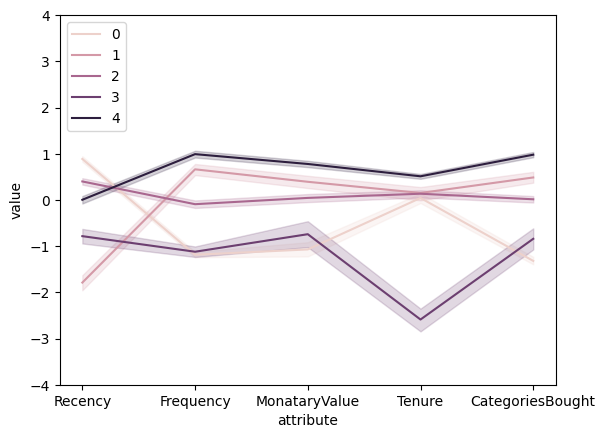

In [20]:
sns.lineplot(x='attribute', y='value', hue='cluster', data=df_snake_walmart_rfm)
plt.legend(loc='upper left')
plt.ylim(-4,4)

**Relative Implication Table**

A relative importance table is a graphical representation that shows the relative importance of different features or variables in a cluster analysis. The heatmap assigns a color-coded score to each variable, indicating its importance in distinguishing between the different clusters. 

In [21]:
cluster_average = df_walmart_rfm[['Recency', 'Frequency', 'MonataryValue', 'Tenure', 'CategoriesBought', 'cluster']].groupby('cluster').mean()
population_average = df_walmart_rfm[['Recency', 'Frequency', 'MonataryValue', 'Tenure', 'CategoriesBought']].mean()
relative_implication = cluster_average / population_average - 1

<AxesSubplot: ylabel='cluster'>

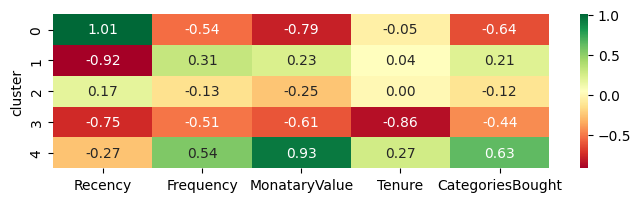

In [22]:
plt.figure(figsize=(8, 2))
sns.heatmap(data=relative_implication, annot=True, fmt='.2f', cmap='RdYlGn')

**Scatterplot**

A scatterplot can help visualize clusters by plotting the data points based on chosen variables, and displaying clusters as groups of points that are more tightly packed together than the rest of the points on the plot. This can give a visual representation of how well the clustering algorithm has separated the data into distinct groups.

In this case, we will be using 3D scatter plot to visualize the cluster with RFM variables.

In [23]:
df_normalized = df_rfm_normalized.copy()
df_normalized['cluster'] = df_walmart_rfm['cluster']

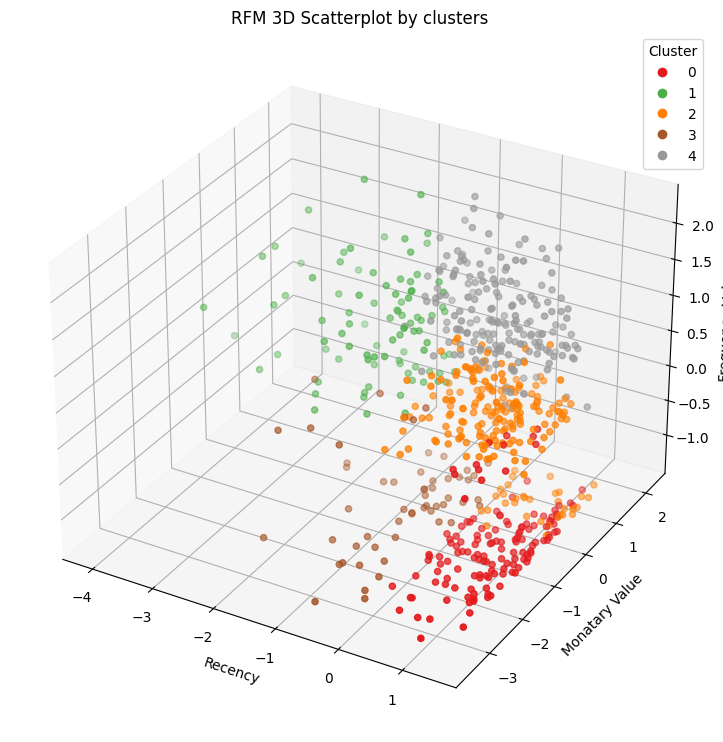

In [24]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211, projection='3d')
scatter  = ax.scatter(df_normalized['Recency'],df_normalized['MonataryValue'], df_normalized['Frequency'], c=df_normalized['cluster'],cmap='Set1')
ax.set_xlabel('Recency')
ax.set_ylabel('Monatary Value')
ax.set_zlabel('Frequency Value')

#ax2 = fig.add_subplot(212, projection='3d')
#scatter  = ax2.scatter(df_normalized['CategoriesBought'],df_normalized['Frequency'], df_normalized['MonataryValue'], c=df_normalized['cluster'],cmap='tab10')
#ax2.set_xlabel('CategoriesBought')
#ax2.set_ylabel('Frequency')
#ax2.set_zlabel('MonataryValue')

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title='Cluster')
#ax2.legend(handles, labels, title='Cluster')
plt.title('RFM 3D Scatterplot by clusters')
plt.show()

**Implications:**
- _**Cluster 0**_ 
    - These customers represents one-time shoppers with low RFM values in all attributes, indicating low engagement and low potential for future business.
- _**Cluster 2**_
    -  These customers are moderate to low spenders with moderate frequency and recency, indicating regular but not highly engaged shoppers.
- _**Cluster 3**_ 
    - This segment represents new customers with low recency and tenure. Businesses can target them with tailored marketing strategies to increase conversion rates and turn them into loyal customers.
- _**Cluster 4**_ 
    - This segment represents the most prominent group of customers who shop frequently and spend the most with high values across all RFM and other additional attributes. However, they are not very active currently, and businesses can focus on reaching them to increasing customer engagement to maximize their potential value.
- _**Cluster 1**_
    - This segment follows similar but less degree of behavior compared to _Cluster 4_, but with better recency scores, indicating more loyal and engaged customers who shop regularly and spend a lot in the store.

## High Value Cluster

Each cluster suggests that different marketing strategies should be implemented to target specific customer groups. However, it is clear that **_Cluster 4_ is the high valuable segment** that the business should focus on due to their high spending but low engagement. By analyzing the behavior of this group, we can better tailor our marketing efforts to increase their engagement with the business.

In [25]:
df_customer_cluster4 = df_walmart_rfm[df_walmart_rfm['cluster'] == 4]
df_customer_cluster4

,Customer Name,Recency,Frequency,MonataryValue,Tenure,CategoriesBought,cluster
1,Aaron Hawkins,735,3,1328.13,1329,5,4
3,Adam Bellavance,149,3,2693.92,835,4,4
4,Adam Hart,260,3,463.77,1142,5,4
6,Adrian Barton,103,3,1330.17,462,5,4
7,Adrian Hane,119,3,1309.88,1263,8,4
...,...,...,...,...,...,...,...
673,Vicky Freymann,116,3,168.20,1256,5,4
677,Vivek Gonzalez,116,5,690.56,1134,7,4
680,William Brown,185,5,5523.06,1361,11,4
681,Xylona Preis,83,4,660.19,1301,7,4


Let's look at what are the product that these high value customers buy so business know which products they should focus on implementing a appropriate marketing strategy

The most popular items purchased by the high-value segment

In [26]:
df_walmartcluster4 = df_walmart[df_walmart['Customer Name'].isin(df_customer_cluster4['Customer Name'])]
products = df_walmartcluster4.groupby(['Category','Product Name']).agg( QuantityBought = ('Quantity','sum'), TotalSales = ('Sales','sum')).sort_values(['QuantityBought','TotalSales'], ascending=False)
df_products = products.reset_index()
df_products

,Category,Product Name,QuantityBought,TotalSales
0,Fasteners,Staples,31.0,104.48
1,Furnishings,Eldon Wave Desk Accessories,28.0,147.60
2,Paper,Staples,26.0,415.58
3,Binders,Clear Mylar Reinforcing Strips,25.0,345.77
4,Tables,KI Conference Tables,23.0,1233.50
...,...,...,...,...
1039,Fasteners,"Acco Banker's Clasps, 5 3/4""-Long",1.0,2.88
1040,Labels,Avery 509,1.0,2.61
1041,Art,Newell 311,1.0,2.21
1042,Fasteners,Colored Push Pins,1.0,1.81


The most popular category for the high-value segment

In [27]:
df_products['Category'].value_counts()

Paper          156
Binders        142
Furnishings    107
Phones         100
Art             89
Accessories     84
Storage         73
Chairs          54
Appliances      47
Labels          39
Tables          31
Bookcases       27
Supplies        23
Envelopes       23
Machines        21
Fasteners       20
Copiers          8
Name: Category, dtype: int64

## Utilizing Insights

To effectively target high-value customers, it's important to leverage the insights gained from their past purchasing behaviors.

Based on our understanding that these customers tend to buy certain products we can tailor our marketing strategies to increase conversions and drive sales. 

Here are a few tactics we can use:

- Personalization: By personalizing our marketing messages to feature products that align with their past purchases, we can offer tailored recommendations and discounts that resonate with their buying habits.

- Loyalty programs: High-value customers are more likely to engage with loyalty programs that reward them for their repeat business. By offering exclusive discounts, early access to new products, and other perks, we can incentivize these customers to continue making purchases.

- Upselling and cross-selling: We can use the opportunity of a purchase to upsell or cross-sell related products. For example, if they buy a new phone, we can recommend a phone case or screen protector to accompany it, which increases the value of their purchase and enhances their overall experience with the store
